# Posttest 5 - Praktikum Kecerdasan Buatan 2024

### DIO DHARMAESA (2209106053)

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('cs_students.csv')
data.head(10)

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong
5,6,Laura Lee,Female,22,3.9,Computer Science,Machine Learning,Image Recognition,Machine Learning Engineer,Strong,Average,Weak
6,7,William Johnson,Male,20,3.6,Computer Science,Database Management,SQL Query Optimization,Database Administrator,Average,Strong,Weak
7,8,Sarah Miller,Female,21,3.7,Computer Science,Cloud Computing,AWS Deployment,Cloud Solutions Architect,Weak,Strong,Average
8,9,James Wilson,Male,23,3.3,Computer Science,Mobile App Development,Android App,Mobile App Developer,Average,Weak,Strong
9,10,Olivia Clark,Female,22,3.5,Computer Science,Computer Graphics,3D Rendering,Graphics Programmer,Weak,Average,Strong


kode diatas menampilkan semua import library yang digunakan didalm posttest ini. kemudian saya mengimport csv dimasukan kedalam variabel data dan saya panggil head (data teratas) nya sebanyak 10 indeks.

In [3]:
# Encoding categorical features
label_encoders = {}
for column in ['Gender', 'Major', 'Interested Domain', 'Future Career', 'Python', 'SQL', 'Java']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Separate features and target
X = data[['Gender', 'Age', 'GPA', 'Major', 'Interested Domain', 'Python', 'SQL', 'Java']].values
y = data['Future Career'].values

y = OneHotEncoder(sparse_output=False).fit_transform(y.reshape(-1, 1))
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


kemudian kode diatas saya melalukan data preprocessing untuk mengencoder data int. kemudian meinisialisasi features dan target. lalu melakukan standarisasi.

In [4]:
data.head(10)

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,1,21,3.5,0,0,Chatbot Development,21,1,1,2
1,2,Alice Johnson,0,20,3.2,0,10,Data Analytics,7,0,1,2
2,3,Robert Davis,1,22,3.8,0,24,E-commerce Website,29,1,1,0
3,4,Emily Wilson,0,21,3.7,0,26,Full-Stack Web App,32,2,1,1
4,5,Michael Brown,1,23,3.4,0,7,Network Security,18,0,2,1
5,6,Laura Lee,0,22,3.9,0,19,Image Recognition,20,1,0,2
6,7,William Johnson,1,20,3.6,0,11,SQL Query Optimization,8,0,1,2
7,8,Sarah Miller,0,21,3.7,0,4,AWS Deployment,3,2,1,0
8,9,James Wilson,1,23,3.3,0,20,Android App,22,0,2,1
9,10,Olivia Clark,0,22,3.5,0,5,3D Rendering,16,2,0,1


kode diatas menampilkan hasil data preprocessing pada dataset saya.

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=50, batch_size=4, validation_data=(X_val, y_val))

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.0038 - loss: 3.5088 - val_accuracy: 0.0278 - val_loss: 3.4802
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1044 - loss: 3.3874 - val_accuracy: 0.1111 - val_loss: 3.3970
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2474 - loss: 3.2488 - val_accuracy: 0.1389 - val_loss: 3.2667
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3030 - loss: 3.0009 - val_accuracy: 0.2500 - val_loss: 3.0821
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3809 - loss: 2.6488 - val_accuracy: 0.2500 - val_loss: 2.8598
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4271 - loss: 2.2546 - val_accuracy: 0.2500 - val_loss: 2.6328
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4509 - loss: 2.0486 - val_accuracy: 0.3056 - val_loss: 2.5130
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5116 - loss: 1.8510 - val_accuracy: 0.3333 - val_

kode diatas saya mendefinisikan model dengan beberapa lapisan atau layers. kemudian model dikompilasi menggunakan optimizer Adam. dan terakhir melatih model dengandata teraining selama 50 epoch dengan batchsize 4, dan ada data validationnya juga.

In [10]:
# Evaluate 
train_accuracy = model.evaluate(X_train, y_train)[1] * 100
val_accuracy = model.evaluate(X_val, y_val)[1] * 100

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Validation Accuracy: {val_accuracy:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9110 - loss: 0.3109
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5949 - loss: 3.0190
Training Accuracy: 91.67%
Validation Accuracy: 61.11%


kode diatas menghitung dari akurasi model pada data training sblumnya.  dan juga menghitung dari akurasi model pada data validasi juga. dan dapat dilihat hasilnya adalah 91an% untuk training dan 61an% untuk validation.

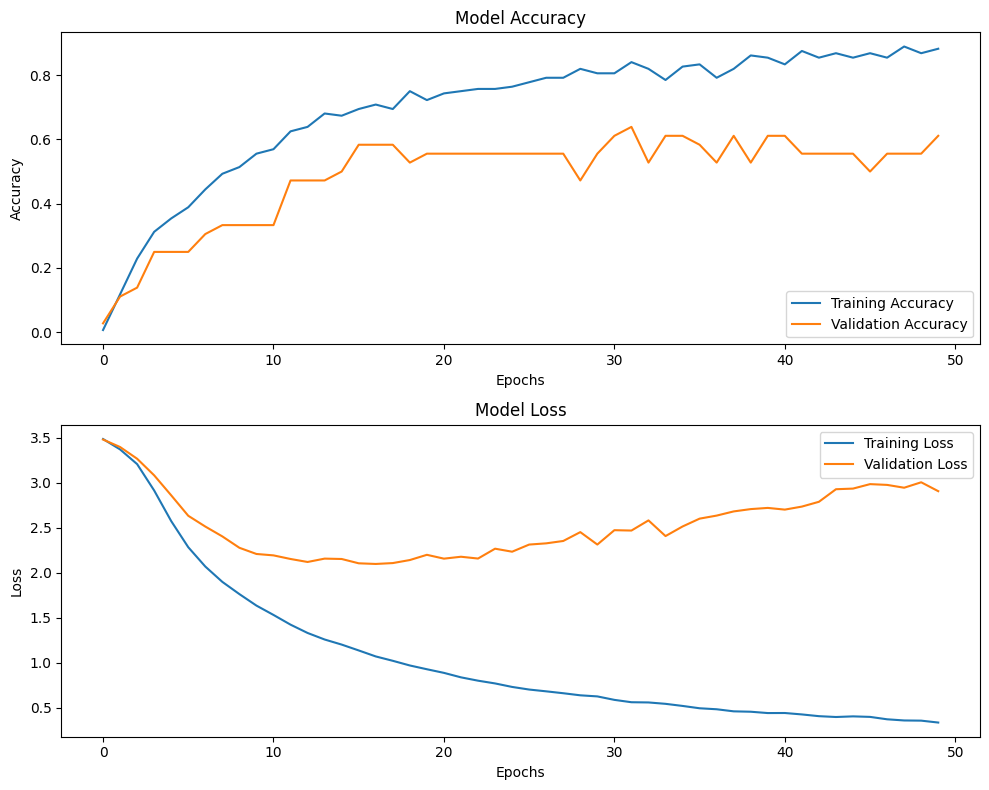

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot Accuracy
ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right')

# Plot Loss
ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()